In this problem, you are going to implement a PID controller for a simulated autonomous vehicle (AV). The goal is to have the AV follow a reference line set by x = 0, y = y_desired. y_desired is set to be 0 by default.

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class AV(object):
    def __init__(self, length=20.0):
        # Create AV and initialize location and orientation to 0, 0, 0.
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length

    def set(self, x, y, orientation):
        # Set the coordinate of an AV.
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)


    def move(self, steering, speed, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle(max 90 degree), the control input to the AV
                   generated by the PID controller
        spped = most be non-negative. In this problem, it is a fixed value. 
        You can change the speed to observe the performance of the AV.
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if speed < 0.0:
            speed = 0.0

        # Execute motion based on the bicycle model - DO NOT CHANGE THIS PART
        turn = np.tan(steering) * speed / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += speed * np.cos(self.orientation)
            self.y += speed * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = speed / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

# PID Control

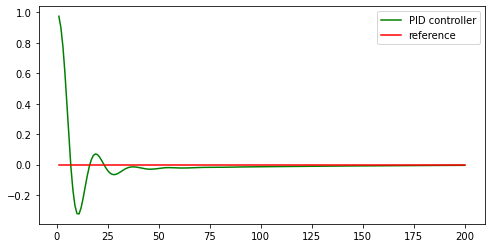

In [12]:
av = AV()
av.set(0, 1, 0)

def run(av, y_desired, Kp, Ki, Kd, n=200, speed=1.0):
    x_trajectory = []
    y_trajectory = []

    #TODO: implement the PID controller
    err=0
    prev_err=0
    int_err=0
    for _ in range(n):
        err = av.y
        diff_error = err - prev_err
        prev_err = err
        int_err += err
        steer = -Kp * err - Kd * diff_error - Ki * int_err
        av.move(steer, speed)
        x_trajectory.append(av.x)
        y_trajectory.append(av.y)
        
    return x_trajectory, y_trajectory

# Please adjust the values of Kp, Ki, and Kd to observe the performance of the AV
# Please also change y_desired to observe how the AV tracks different lines
# Briefly summarize your observations by changing the values of Kp, Ki, Kd, and y_desired
x_trajectory, y_trajectory = run(av, 0, 2, 0.02, 5)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()


we set Ki and Kd to zero and then raise the proportional term (Kp) until the system exhibits oscillating behavior. Kd was then set to decrease oscillation, while Ki was modified to reduce steady-state inaccuracy.

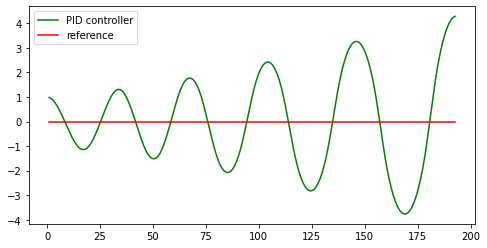

In [13]:
av = AV()
av.set(0, 1, 0)
x_trajectory, y_trajectory = run(av, 0, 0.6, 0, 0)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()

The Kd figure that ends the oscillating tendency would then be determined and set to 1.6, and with Kp = 0.6 and Ki = 0.

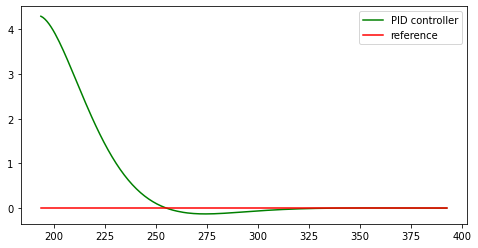

In [14]:
x_trajectory, y_trajectory = run(av, 0, 0.06, 0, 1.6)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()

We adjust the Ki to 0.0002 in order to lessen the steady-state loss.

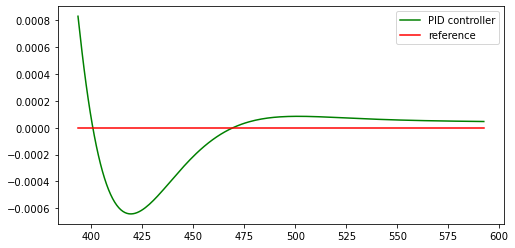

In [15]:

x_trajectory, y_trajectory = run(av, 0, 0.06, 0.0002, 1.6)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()

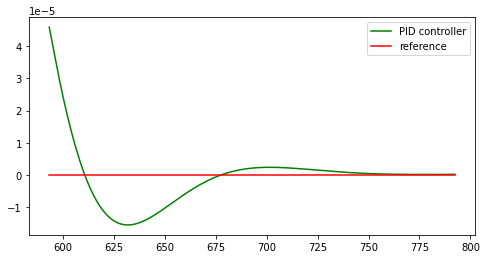

In [16]:

x_trajectory, y_trajectory = run(av, 0, 0.06, 0.00031, 1.29)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()

When y_desired is increased then the time to stabilize the system is reduced

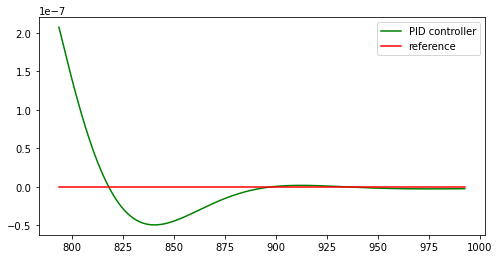

In [17]:
x_trajectory, y_trajectory = run(av, 10, 0.06, 0.00031, 1.29)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()

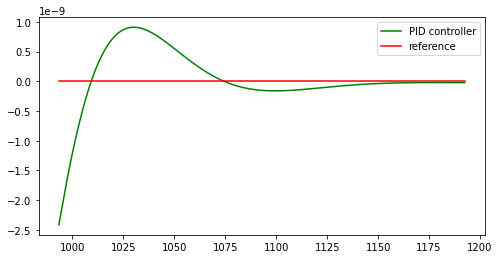

In [18]:
x_trajectory, y_trajectory = run(av, 0.05, 0.06, 0.00031, 1.29)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend()